In [106]:
import serial
import numpy as np
from PIL import Image
import keyboard
import matplotlib.pyplot as plt

In [107]:
sarr = []
for i in range(4):
	s = '1111000'
	s = s[:i] + '0' + s[i + 1:]
	for j in range(8):
		s2 = str(bin(j))[2:]
		s = s[:-len(s2)] + s2
		sarr.append(s)
print(sarr)

['0111000', '0111001', '0111010', '0111011', '0111100', '0111101', '0111110', '0111111', '1011000', '1011001', '1011010', '1011011', '1011100', '1011101', '1011110', '1011111', '1101000', '1101001', '1101010', '1101011', '1101100', '1101101', '1101110', '1101111', '1110000', '1110001', '1110010', '1110011', '1110100', '1110101', '1110110', '1110111']


In [188]:
# Establish the serial connection
# ser = serial.Serial('COM5', 9600) # for josh
ser = serial.Serial('/dev/tty.usbmodem2101', 9600) # for pablo

#size 256 array
handArray =  np.arange(256, dtype=float)
#3d data set
dataSet = np.empty((0, 16, 16), dtype=float)
start = False
i = 0
j = 0 

command = input("type g to begin")
ser.write(command.encode())

while True:
  
  if keyboard.is_pressed('esc'):
    stop = input("type g to end")
    np.save('dataSet.npy', dataSet)
    ser.write(stop.encode())
    break
  
  data = ser.readline()
  data = data.decode().strip().split() # Decode the received bytes and remove whitespace
  selects = data[0]
  # data = [int(data[k:k+1]) for k in range(len(data))]
  inputData = np.float_(data[1:])*5/1024
  if (selects == sarr[0]):
    start = True
  # if (start):
  #   print(selects, inputData)
  
  if (start):
    if (selects != sarr[j]):
      print(j, selects, "error")
    # print(i, selects, (inputData))

    #loops through array with prper indexing
    if i < 8:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 8:
        i = 64

    elif i > 8 and i < 72:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 72:
        i = 128
      
    elif i > 72 and i < 136:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 136:
        i = 192
    
    elif i > 135 and i < 200:
      for k in range(8):
        handArray[(8*k)+i] = inputData[k]
      i = i + 1
      if i == 200:
        i = 0
        print(handArray)
        array = (np.reshape(handArray, (16,16)))
        dataSet = np.append(dataSet,[array], axis = 0)
    
    j = (j+1) % 32

#close the connection
ser.close()


[ 0.30273438  0.33203125  0.1171875   0.68847656  0.61035156  1.22558594
  1.12792969  0.49316406  1.29882812  0.7421875   0.33691406  0.37597656
  0.65429688  1.50390625  0.59570312  0.55175781  0.20996094  0.11230469
 -0.02441406  0.390625    1.7578125   0.90332031  1.21582031  0.88378906
  0.27832031  0.53710938  0.63476562  0.89355469  0.390625    0.2734375
  0.90332031  0.546875   -0.13183594  0.63964844  0.01464844  0.74707031
  3.13476562  1.00097656  1.53808594  3.19824219  0.20019531  0.390625
  0.1953125   0.390625    0.625       0.3515625   0.62988281  0.35644531
  0.32226562  0.3125      0.31738281  0.3125      1.03515625  1.41113281
  1.04003906  1.41113281  0.13183594  1.38671875  0.13183594  1.38183594
  0.64453125  0.09277344  0.63964844  0.09277344  0.58105469  0.02441406
  0.57128906  0.625       3.13476562  1.32324219  1.8359375   1.58203125
  0.24414062 -0.01953125  0.32226562  0.37109375  0.99121094  0.38574219
  0.37597656  0.42480469 -0.04394531  0.44433594 -0.20

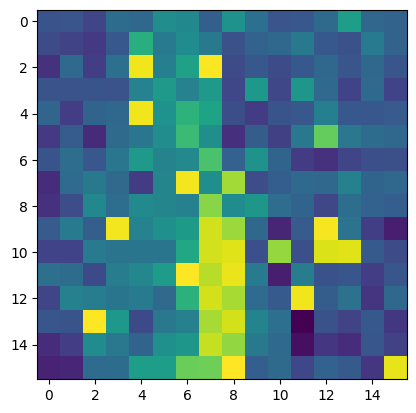

In [189]:
d = np.load('dataSet.npy')

image = Image.new("1", (16, 16))
# Load the pixel data from the array
pixels = [pixel for row in d[0] for pixel in row]

# Put the pixel data into the image
image.putdata(pixels)

# Save the image to a file
image.save("output.png")

plt.imshow(d[0])
plt.savefig('pltfig.png')

In [87]:
for i in range(0, len(d)):
    print(d[i])
    print()

[[ 0.87402344  0.81054688  0.703125    1.49902344  1.9140625   1.33789062
   1.12792969  1.77246094  3.09570312  1.07421875  0.28808594  0.14160156
   0.20996094  1.18164062  0.25390625  0.30273438]
 [ 0.91308594  0.89355469  1.00097656  1.36230469  3.25195312  1.42578125
   1.46484375  2.28515625  2.75878906  0.89355469  0.60546875  0.83984375
   2.49023438  0.09277344  0.64453125  0.29296875]
 [ 0.703125    1.71386719  1.21582031  1.76757812  3.34472656  1.80664062
   2.03613281  3.37402344  3.1640625   0.82519531  3.18359375  0.83984375
   3.06640625  0.11230469  3.02734375  0.10742188]
 [ 1.12304688  1.20117188  1.11816406  1.21582031  2.94433594  2.15820312
   2.91992188  2.1484375   2.41210938  2.24609375  2.40234375  2.24121094
   2.87597656 -0.0390625   2.87109375 -0.0390625 ]
 [ 1.59667969  1.15234375  1.89453125  1.27929688  3.37402344  2.62695312
   2.58789062  3.10546875  2.33398438  1.10351562  1.27929688  3.14941406
   0.98632812  0.26367188  0.20019531  0.29296875]
 [ 1.